## 2章で作成したライブラリーのテストと実験

作成したライブラリーのimport

In [9]:
from Library_chr2.seed import seed_torch
from Library_chr2.train_1epoch import train_1epoch

In [10]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from sklearn.datasets import load_digits
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

0.8742348358375069


Text(0, 0.5, 'loss')

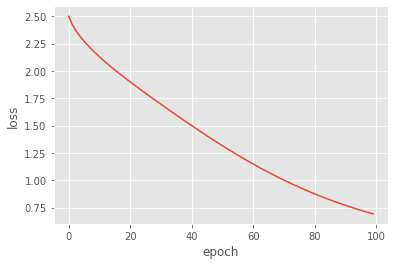

In [11]:
seed_torch()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

digits = load_digits()

X = digits.data
y = digits.target
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)


# ニューラルネットワークの形成
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

for ep in range(100):
    optimizer.zero_grad()

    #　yの予測値を算出
    out = model(X)

    #　損失の計算
    loss = lossfun(out, y)
    loss.backward()

    #　勾配更新
    optimizer.step()

    losses.append(loss.item())

_, pred = torch.max(out, 1)

# 学習に用いたデータのうちどれくらいが分類に成功したか
print((pred == y).sum().item() / len(y))

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")

100%|██████████| 29/29 [00:00<00:00, 1670.99it/s]


Text(0, 0.5, 'loss')

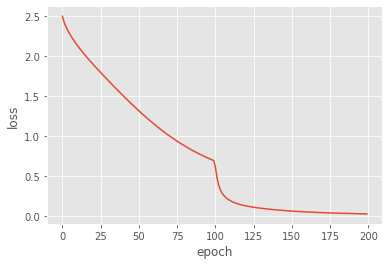

In [12]:
dataset = TensorDataset(X, y)
train_loader = DataLoader(dataset, batch_size=64, shuffle=False)
for ep in range(100):
    avg_acc, avg_loss = train_1epoch(model, train_loader, lossfun, optimizer, device)
    losses.append(avg_loss)

plt.plot(losses)
plt.xlabel("epoch")
plt.ylabel("loss")